# SHAP值特征重要性分析示例

SHAP (SHapley Additive exPlanations) 是一个基于博弈论的方法，用于解释机器学习模型的预测结果。

In [10]:
# 导入必要的库
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import shap
import matplotlib.pyplot as plt

In [11]:
# 加载示例数据集（使用加利福尼亚房价数据集）
from sklearn.datasets import fetch_california_housing
# 获取数据集
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target

In [12]:
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建并训练模型
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

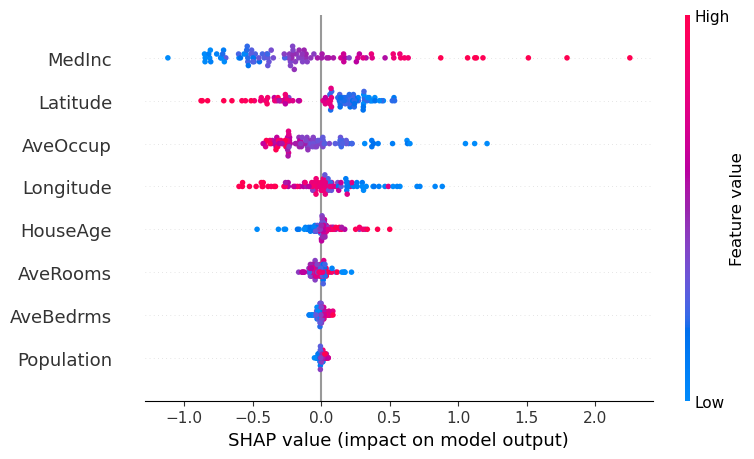

In [13]:
# 计算SHAP值（使用部分数据进行解释）
# 只使用前100个测试样本进行分析
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test.iloc[:100])

# 绘制摘要图
plt.figure(figsize=(10, 6))  # 设置图形大小
shap.summary_plot(shap_values, X_test.iloc[:100], show=False)  # show=False 可以加快绘图
plt.tight_layout()  # 优化布局
plt.show()

## 结果解释

1. SHAP摘要图显示了每个特征对预测的影响：
   - 横轴表示SHAP值大小（特征对预测的影响程度）
   - 每个点代表一个样本
   - 颜色表示特征值的高低（红色代表高值，蓝色代表低值）

2. 条形图展示了特征的整体重要性：
   - 条形越长，表示该特征对预测结果的影响越大
   - 可以直观地比较不同特征的相对重要性

3. 使用SHAP值的优势：
   - 可以分析特征值的具体影响方向（正面/负面）
   - 基于严格的数学理论
   - 可以解释单个预测结果